# Exercise sheet 7
**Hello everyone!**

**Points: 15**

Topics of this exercise sheet are:
* Probabilities
* Law of large numbers
* Central limit theorem


Please let us know if you have questions or problems! <br>
Contact us during the exercise session or on [Piazza](https://piazza.com/unibas.ch/spring2024/63982).

**Automatic Feedback**

This notebook can be automatically graded using Otter grader. To find how many points you get, simply run `grader.check_all()` from a new cell. 

In [524]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli, norm

In [525]:
# Initialize Otter
import otter


grader = otter.Notebook("07-exercise-pids2024.ipynb")

## 1) Central limit theorem (8 points)
The central limit theorem is a key results of practical importance for data scientists. In this first part, we will work around this result to better understand it.


Let's start with the simplest statistical example, the toss of a coin. We simulate the toss using the generation of a Bernoulli random variable in the library scipy. We display the empirical distribution (histogram) of the generated samples. Let's call the sample size $N$.

(array([511.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 489.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

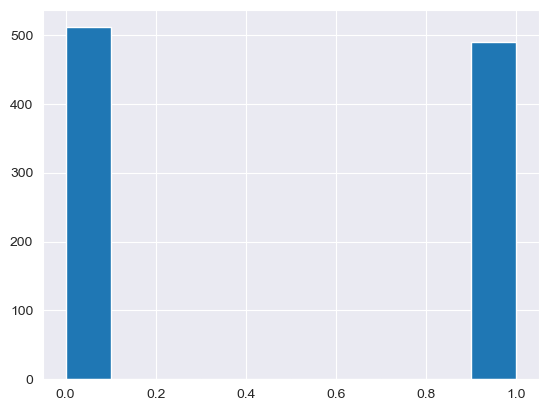

In [526]:
N = 1000
toss_coin = bernoulli.rvs(p=0.5, size=N)
plt.hist(toss_coin)

### 1a (2 points)
Reproduce this experiment $M$ times. Store the result in an array `toss_coin_all` of **size (M,N)**.

In [527]:
def repeat_experiment():
    return bernoulli.rvs(p=0.5, size=N)


class Question1a:
    M = 1000
    
    toss_coin_all = np.array(
        [repeat_experiment() for _ in range(M)])

In [528]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### 1b (1 point)
For each of the $M=1000$ experiment, compute the sum of the obtained values. Store the result in an array named `toss_sum`.

In [529]:
class Question1b:
    M = Question1a.M
    toss_coin_all = Question1a.toss_coin_all
    
    toss_sum = np.array([np.sum(arr) for arr in toss_coin_all])

In [530]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

### 1c (1 point) 
Then, display the histogram of this result, using `plt.hist` using **15 bins**. Make sure you plot it as a density (I.e. the area of the histogram sums to 1 (*see hint*) by choosing the right parameters. Assign the plot to the variable `density_plot`.

Hint: [Examples using: matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 1c        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

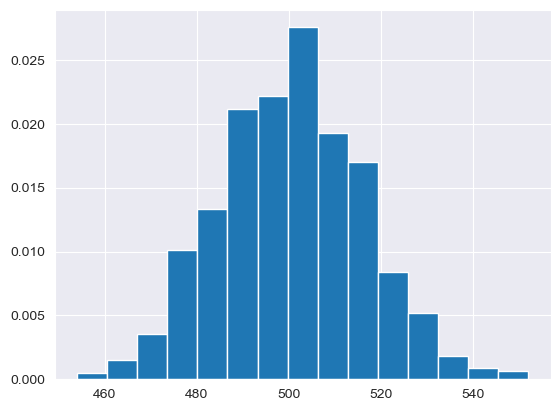

In [531]:
class Question1c:
    toss_sum = Question1b.toss_sum
    
    density_plot = plt.hist(toss_sum, bins=15, density=True)


In [532]:
grader.check("Question 1c")

Question 1c results: All test cases passed!

<!-- END QUESTION -->



### 1d (2 point)
Now we want to fit a Gaussian distribution to the samples in the previsous part. In particualr, we want to fit a Gaussian distribution to the following random variable:

$$
 S_N = \sum_{i = 1}^N X_i
$$
As mentioned in the lecture, the probablity distribution of $S_N$ tends to a Gaussian distribution as N goes to infinity:
$$
 S_N \to \mathcal{N}(N \mu, N \sigma^2)
$$
Now, **display the probability density function (pdf) of the Gaussian random variable.** The mean ($\mu$) and standard deviation ($\sigma$) of the *Bernouli distribution* are:

- $N$, the number of samples (1000)
- $\mu = 0.5$
- $\sigma = 0.5$

Please use the variable `x` defined below as the x-axis of your plot. Name the plot `gaussian_plot`. Please use the scipy library and the example in this webpage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 1d        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

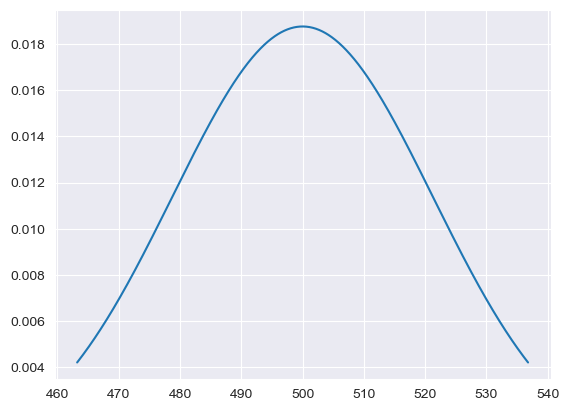

In [533]:
class Question1d:
    from scipy.stats import norm  # Please do not modify this line
    
    mu = 0.5
    sigma = 0.5
    
    x = np.linspace(norm.ppf(0.01, N * mu, np.sqrt(N) * sigma),
                    norm.ppf(0.99, N * mu, np.sqrt(N) * sigma),
                    N)
    
    gaussian_plot = plt.plot(x, norm.pdf(x, np.mean(x), np.std(x)))


In [534]:
grader.check("Question 1d")

Question 1d results: All test cases passed!

<!-- END QUESTION -->



### 1e (2 points)
Display the empirical distribution of the sum of tossed coins and the pdf of the Gaussian random variable on the same plot. Please use the variable "x" defined below as the x-axis of your plot.

Experiment with what happens when you make $N$ larger and smaller. Add the answer to the following question to the variable `answer_1e`.

1. Empirically, the size of $N$ does not make a huge difference.
2. The smaller $N$ the more accurate the fit becomes
3. The larger $N$ the more accurate the fit becomes

***And don't forget to set it back to N=1000 and M=100.***

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 1e        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 3      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

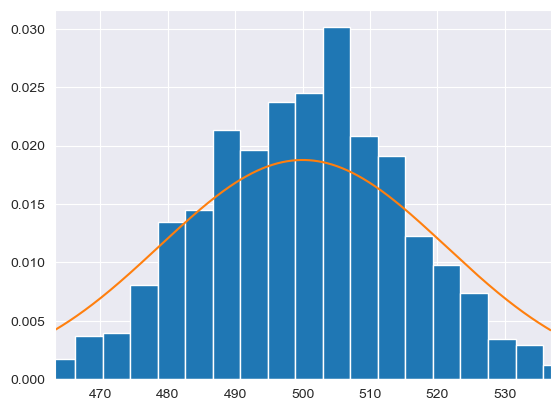

In [535]:
class Question1e:
    mu = Question1d.mu
    sigma = Question1d.sigma
    toss_sum = Question1b.toss_sum
    
    x = np.linspace(norm.ppf(0.01, N * mu, np.sqrt(N) * sigma),
                    norm.ppf(0.99, N * mu, np.sqrt(N) * sigma),
                    N)
    
    fig, ax = plt.subplots(1, 1)
    ax.hist(toss_sum, bins='auto', density=True)
    ax.plot(x, norm.pdf(x, np.mean(x), np.std(x)))
    ax.set_xlim([x[0], x[-1]])
    
    # replace the answer with the correct answer to the above question
    answer_1e = 3

In [536]:
grader.check("Question 1e")

Question 1e results: All test cases passed!

<!-- END QUESTION -->





## 2) Law of large numbers (LLN) (5 points)
The LLN is also a key tool used by all data scientists. This principle is the basis of what is called Monte Carlo simulation. <br>
In this paragraph, we will use this result to estimate the mean of a Poisson random variable.

### 2a (1 point)
Using the scipy library, **display the probability mass function of the Poisson distribution for $\lambda=5$**. 
Please use the variable `x` defined below as the x-axis of your plot.

You have to use the scipy library and can take a look at the example in this webpage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html. 

**Assign the plot to the variable:** `poisson_pdf_plot`.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2a        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 1      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

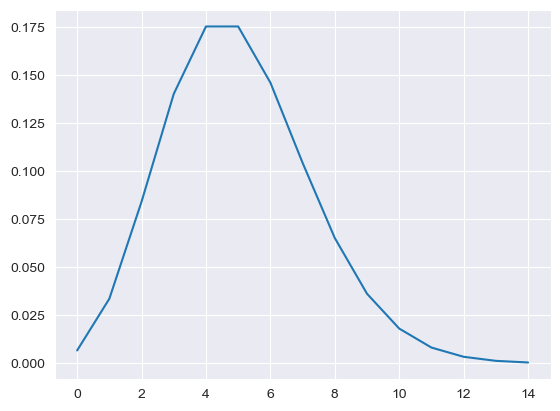

In [537]:
from scipy.stats import poisson  # Please do not delete this line


class Question2a:
    lam = 5
    x = np.arange(poisson.ppf(0.0001, lam),
                  poisson.ppf(0.9999, lam))
    poisson_pmf = poisson.pmf(x, lam)
    poisson_plot = plt.plot(x, poisson_pmf)


In [538]:
grader.check("Question 2a")

Question 2a results: All test cases passed!

<!-- END QUESTION -->



### 2b (2 points)
Generate $P=10000$ independent samples from the given poisson distribution ($\lambda = 5$) and store them in the variable `data`. Calculate the empirical mean when using the first $i = 11,12,13,...,10000$ samples from the `data` variable. *Hint:* You can use `np.cumsum()` function in numpy which calculates the cumulative sum. 

Make sure to divide it appropriately. Store the result in the variable `mean_est`. 
Please plot the the calculated empirical means and compare them with the true mean of the given poisson distribution (expected value) $\lambda = 5$ using a scatter plot.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2b        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

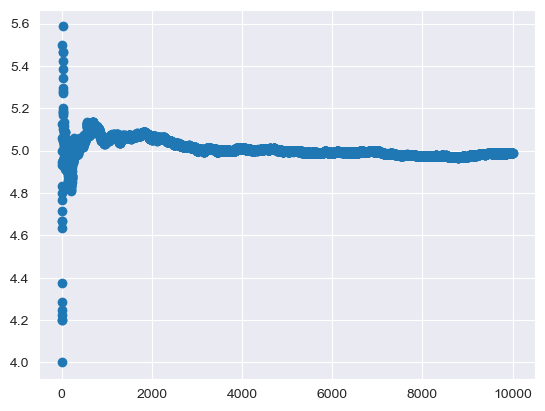

In [553]:
class Question2b:
    P = 10000
    data = poisson.rvs(Question2a.lam, size=10000)
    xs = np.arange(1, len(data) + 1)
    mean_est = np.cumsum(data) / xs
    plt.scatter(xs, mean_est)

In [540]:
grader.check("Question 2b")

Question 2b results: All test cases passed!

<!-- END QUESTION -->



### 2c (2 points)
It is rather hard to see if the empirical mean is tending to the true one. Compute the absolute error between the empirical and the true mean and store it into a variable `abs_err`. 
Plot the absolute error against the number of samples used ($x$-axis). Use a log scale (for the error).

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2c        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

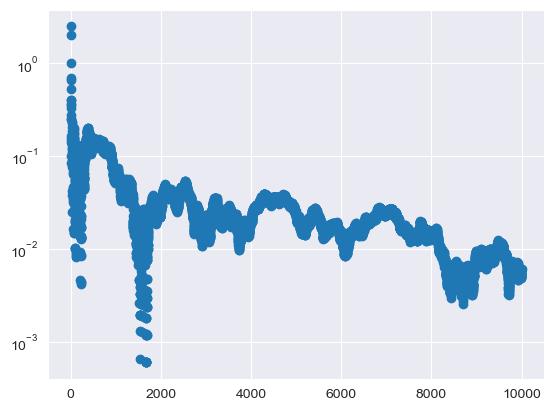

In [552]:
class Question2c:
    abs_err = np.abs(Question2b.mean_est - Question2a.lam)
    plt.yscale('log')
    err_plot = plt.scatter(Question2b.xs, abs_err)


In [542]:
grader.check("Question 2c")

Question 2c results: All test cases passed!

<!-- END QUESTION -->



## 3) Monte Carlo simulation (2 points)

Did you notice that the previous plots change every time you run again the cells?
This is because the average mean that we compute is still a random estimation. For some realization it may be close to the true mean, for other it may be far. <br>
To get a clear conclusion, we might want to know what is happening in average, what is the average behaviour of this estimator. <br>
<br>
To do so, we will do a Monte Carlo simulation, i.e. reproduce the previous experiment several times and compute the average error.<br>


### 3a (2 points):
Compute and store the absolute error between the average means (using $i=1,2,3,... 10000$ samples as above) and the true mean. Reproduce this experiment $M_{mc}=100$ times, and compute the average error. 
Store the error in a variable `mean_abs_err`. Then plot the error. 
<br>
Hint: for a better display, you can display ony error for $100, 101, ... 10000$ samples.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 3a        # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

0.010413650560449305


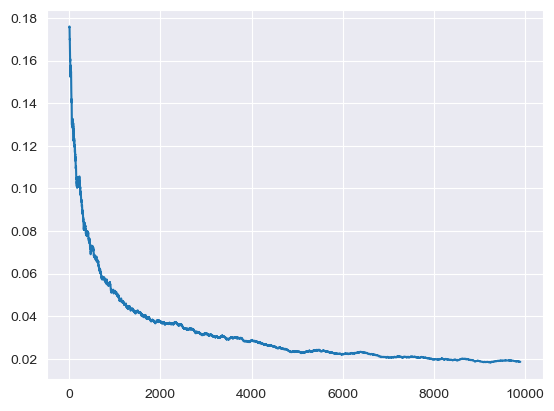

In [554]:
def sample(size):
    data = poisson.rvs(Question2a.lam, size=size)
    xs = np.arange(1, len(data) + 1)
    mean_est = np.cumsum(data) / xs
    
    return np.abs(mean_est - Question2a.lam)


class Question3a:
    M_mc = 100
    NSamples = 10000
    err_abs = np.array([sample(10000) for n in range(M_mc)])
    
    mean_abs_err = np.sum(err_abs, axis=0) / M_mc
    
    start = 100
    err_plot = plt.plot(mean_abs_err[start:])
    
    print(err_plot[0].axes.get_ylim()[0])


In [555]:
grader.check("Question 3a")

Question 3a results: All test cases passed!

<!-- END QUESTION -->



Notice that the plot is not changing much (as in the begining of the LLN paragraph) every time you run the code. This is (maybe) your first Monte Carlo simulation!

We saw in this notebook that by reproducing a large number of time the same experiment, we are able to estimate information about the observation, such as the distribution of the mean of some quantities. However, in many practical situations, it is impossible to have acces to a very large amount of data. In the following of the course you will see that we can construct confidence interval from the observations. This tool will be key to known either or not we can trust the result obtained with a limited amount of data.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [556]:
grader.check_all()

Question 1a results: All test cases passed!

Question 1b results: All test cases passed!

Question 1c results: All test cases passed!

Question 1d results: All test cases passed!

Question 1e results: All test cases passed!

Question 2a results: All test cases passed!

Question 2b results: All test cases passed!

Question 2c results: All test cases passed!

Question 3a results: All test cases passed!